<a href="https://colab.research.google.com/github/PesicLazar/computer-vision-finnal/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set the working path
import os
folder_path = '/content/drive/MyDrive/rock-metal'
os.chdir(folder_path)

In [ ]:
# confusion matrix
def confusion(y_test,y_test_pred,X):
    names=['metal','pog_rock']

    cm=confusion_matrix(y_test,y_test_pred)

    f,ax=plt.subplots(figsize=(10,10))

    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)

    plt.title(X, size = 25)

    plt.xlabel("y_pred")
    plt.ylabel("y_true")

    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [ ]:

# Prepare the training and testing data generator
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
# Load the training and testing datasets from directory
train_dataset = train.flow_from_directory('/content/drive/MyDrive/rock-metal/Training and Validation/',
                                          target_size=(150, 150),
                                          batch_size=32,
                                          class_mode='binary')

test_dataset = test.flow_from_directory('/content/drive/MyDrive/rock-metal/Testing/',
                                        target_size=(150, 150),
                                        batch_size=32,
                                        class_mode='binary')

Found 3389 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
# Get class indices for the testing dataset
test_dataset.class_indices

{'metal': 0, 'pog_rock': 1}

In [ ]:
# Create a sequential model
model = keras.Sequential()
# Add layers to the model
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
106/106 [==============================] - 583s 5s/step - loss: 0.6299 - accuracy: 0.6651 - val_loss: 0.5453 - val_accuracy: 0.7364
Epoch 2/10
106/106 [==============================] - 270s 3s/step - loss: 0.5618 - accuracy: 0.7238 - val_loss: 0.5290 - val_accuracy: 0.7448
Epoch 3/10
106/106 [==============================] - 256s 2s/step - loss: 0.5579 - accuracy: 0.7279 - val_loss: 0.5238 - val_accuracy: 0.7531
Epoch 4/10
106/106 [==============================] - 277s 3s/step - loss: 0.5140 - accuracy: 0.7563 - val_loss: 0.4806 - val_accuracy: 0.7657
Epoch 5/10
106/106 [==============================] - 270s 3s/step - loss: 0.4946 - accuracy: 0.7613 - val_loss: 0.4627 - val_accuracy: 0.7741
Epoch 6/10
106/106 [==============================] - 287s 3s/step - loss: 0.4600 - accuracy: 0.7822 - val_loss: 0.4744 - val_accuracy: 0.7866
Epoch 7/10
106/106 [==============================] - 263s 2s/step - loss: 0.4437 - accuracy: 0.7914 - val_loss: 0.4733 - val_accuracy: 0.7908

In [ ]:
# Evaluate the model on the testing dataset
model.evaluate(test_dataset)

8/8 [==============================] - 7s 879ms/step - loss: 0.4546 - accuracy: 0.8075


[0.45458686351776123, 0.8075313568115234]

In [ ]:
# Make predictions on the testing dataset
y_pred = np.round(model.predict(test.flow_from_directory('/content/drive/MyDrive/rock-metal/Testing/',
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         shuffle=False,
                                                         class_mode='binary')))

Found 239 images belonging to 2 classes.
8/8 [==============================] - 7s 805ms/step


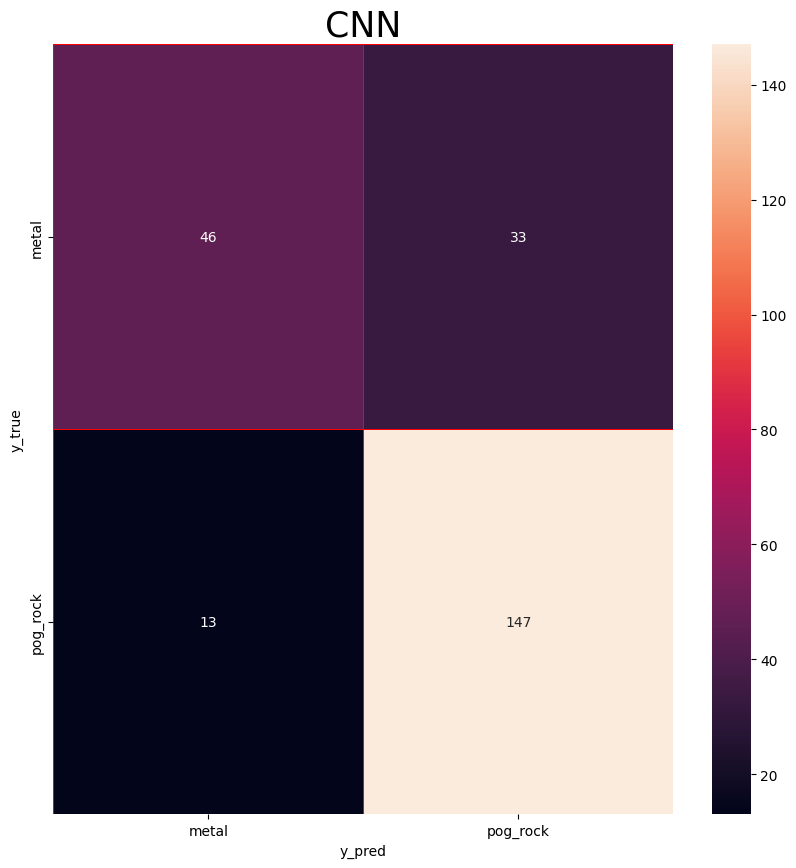

None


In [ ]:
print(confusion(test_dataset.labels, y_pred, "CNN")) # Display the confusion matrix

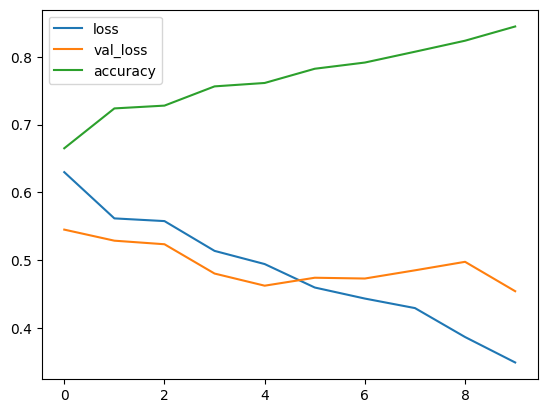

In [ ]:
# Plot the training history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

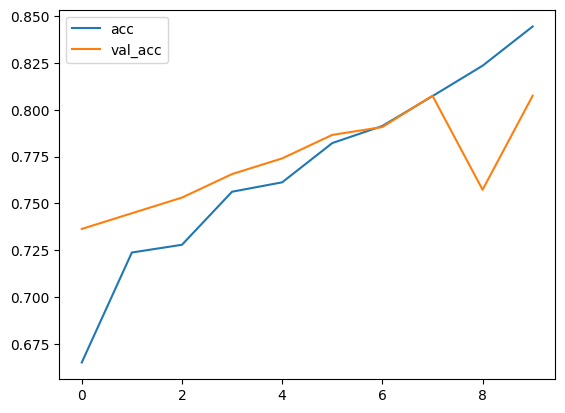

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("metal",fontsize=30)
    elif val == 0:
        plt.xlabel("pogressive rock",fontsize=30)

1/1 [==============================] - 0s 189ms/step
[[1.]]


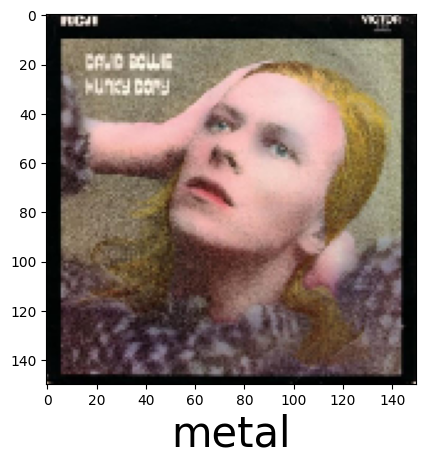

In [ ]:
predictImage('/content/drive/MyDrive/rock-metal/Testing/pog_rock/282.jpg')

1/1 [==============================] - 0s 53ms/step
[[1.]]


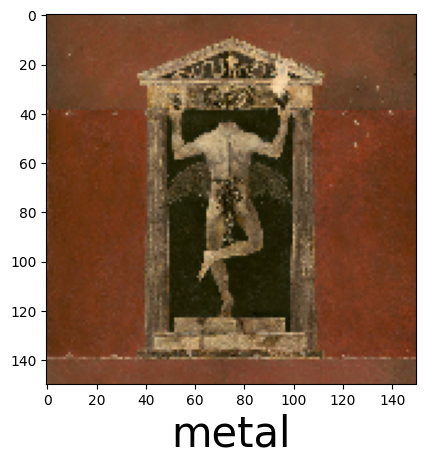

In [ ]:
predictImage('/content/drive/MyDrive/rock-metal/Testing/metal/behemoth___messe_noire.jpeg')

In [ ]:
#Increasing the number of filters and adding more fully connected (dense) layers.
# model = keras.Sequential()
# model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
# model.add(keras.layers.MaxPooling2D(2,2))
# model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2,2))
# model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2,2))
# model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2,2))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(512, activation='relu'))
# model.add(keras.layers.Dense(256, activation='relu'))
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# p = model.fit(train_dataset, epochs=10, validation_data = test_dataset)

In [ ]:
# model.evaluate(test_dataset)
# y_pred = np.round(model.predict(test.flow_from_directory('/content/drive/MyDrive/rock-metal/Testing/',
#                                                          target_size=(150, 150),
#                                                          batch_size=32,
#                                                          shuffle=False,
#                                                          class_mode='binary')))

In [ ]:
# print(confusion(test_dataset.labels, y_pred, "CNN"))

In [ ]:
# plt.plot(p.history['loss'], label='loss')
# plt.plot(p.history['val_loss'], label='val_loss')
# plt.plot(p.history['accuracy'], label='accuracy')
# plt.legend()

In [ ]:
# plt.plot(p.history['accuracy'], label='acc')
# plt.plot(p.history['val_accuracy'], label='val_acc')
# plt.legend()

In [ ]:
# def predictImage2(filename):
#     img1 = image.load_img(filename, target_size=(150, 150))
#     plt.imshow(img1)
#     Y = image.img_to_array(img1)
#     X = np.expand_dims(Y, axis=0)
#     val = p.predict(X)  # Use the updated model 'p' for prediction
#     print(val)
#     if val == 1:
#         plt.xlabel("metal", fontsize=30)
#     elif val == 0:
#         plt.xlabel("progressive rock", fontsize=30)

In [ ]:
# Data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,  # Randomly rotate images within the range (in degrees)
    width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # Apply random shear transformations
    zoom_range=0.2,  # Apply random zoom transformations
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels after rotation or width/height shift
)

In [ ]:
# Load and augment training data
train_dataset = datagen.flow_from_directory(
    '/content/drive/MyDrive/rock-metal/Training and Validation/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Validation data should not be augmented
validation_datagen = ImageDataGenerator(rescale=1/255)

# Load validation data (without augmentation)
validation_dataset = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/rock-metal/Testing/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 3389 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
# Rest my model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with augmented data
model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
106/106 [==============================] - 287s 3s/step - loss: 0.6237 - accuracy: 0.6480 - val_loss: 0.5880 - val_accuracy: 0.6611
Epoch 2/10
106/106 [==============================] - 275s 3s/step - loss: 0.5868 - accuracy: 0.7020 - val_loss: 0.6520 - val_accuracy: 0.6569
Epoch 3/10
106/106 [==============================] - 278s 3s/step - loss: 0.5798 - accuracy: 0.6905 - val_loss: 0.5563 - val_accuracy: 0.7322
Epoch 4/10
106/106 [==============================] - 277s 3s/step - loss: 0.5750 - accuracy: 0.7020 - val_loss: 0.5516 - val_accuracy: 0.7573
Epoch 5/10
106/106 [==============================] - 278s 3s/step - loss: 0.5681 - accuracy: 0.7161 - val_loss: 0.5351 - val_accuracy: 0.7406
Epoch 6/10
106/106 [==============================] - 276s 3s/step - loss: 0.5506 - accuracy: 0.7265 - val_loss: 0.5262 - val_accuracy: 0.7490
Epoch 7/10
106/106 [==============================] - 277s 3s/step - loss: 0.5447 - accuracy: 0.7259 - val_loss: 0.5026 - val_accuracy: 0.7573

In [ ]:
print(classification_report(test_dataset.labels, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        79
           1       0.82      0.92      0.86       160

    accuracy                           0.81       239
   macro avg       0.80      0.75      0.77       239
weighted avg       0.80      0.81      0.80       239



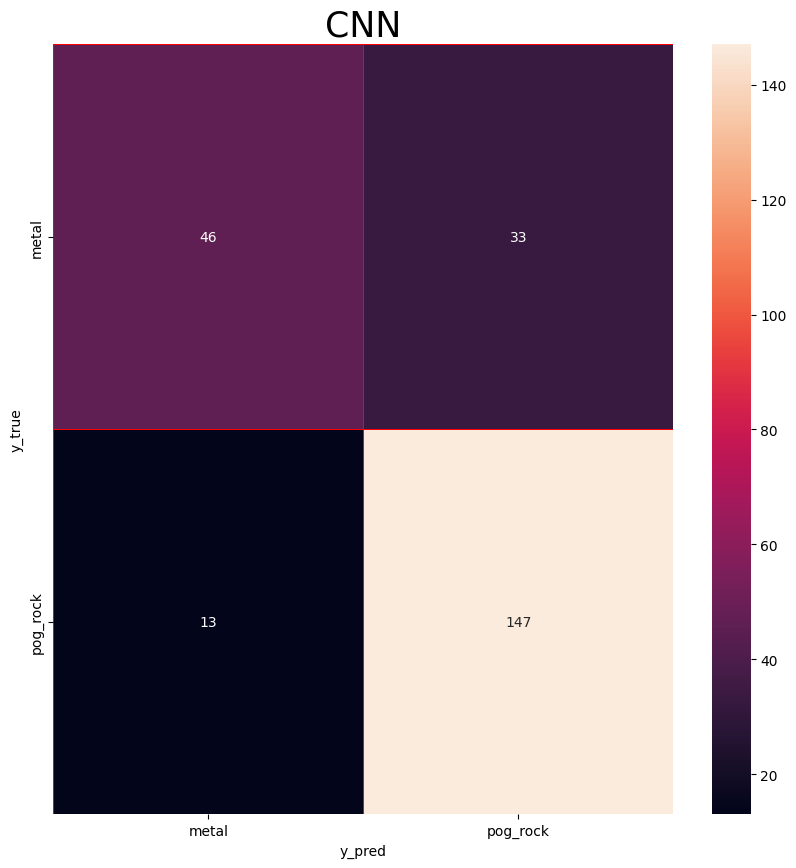

None


In [ ]:
print(confusion(test_dataset.labels, y_pred, "CNN"))

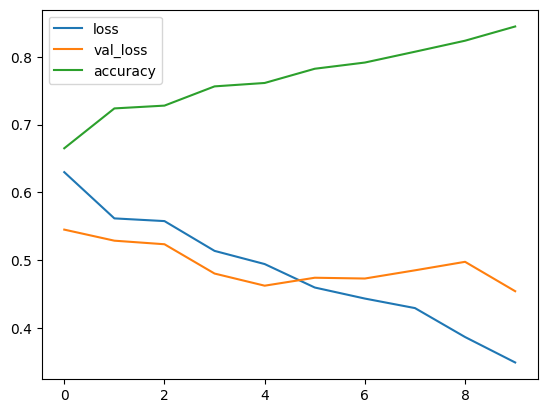

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

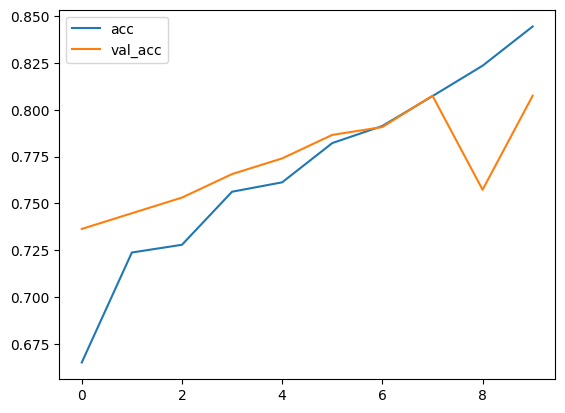

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())  # Add batch normalization after each convolutional layer
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(keras.layers.MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with augmented data and early stopping
model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/10
106/106 [==============================] - 366s 3s/step - loss: 1.9629 - accuracy: 0.6055 - val_loss: 0.7495 - val_accuracy: 0.6444
Epoch 2/10
106/106 [==============================] - 365s 3s/step - loss: 0.8842 - accuracy: 0.6418 - val_loss: 0.8245 - val_accuracy: 0.4728
Epoch 3/10
106/106 [==============================] - 335s 3s/step - loss: 0.5987 - accuracy: 0.6987 - val_loss: 0.6806 - val_accuracy: 0.6109
Epoch 4/10
106/106 [==============================] - 343s 3s/step - loss: 0.5611 - accuracy: 0.7191 - val_loss: 0.6050 - val_accuracy: 0.6987
Epoch 5/10
106/106 [==============================] - 334s 3s/step - loss: 0.5652 - accuracy: 0.7262 - val_loss: 0.5532 - val_accuracy: 0.7238
Epoch 6/10
106/106 [==============================] - 330s 3s/step - loss: 0.5594 - accuracy: 0.7271 - val_loss: 0.5740 - val_accuracy: 0.7364
Epoch 7/10
106/106 [==============================] - 330s 3s/step - loss: 0.5387 - accuracy: 0.7253 - val_loss: 0.6024 - val_accuracy: 0.6904

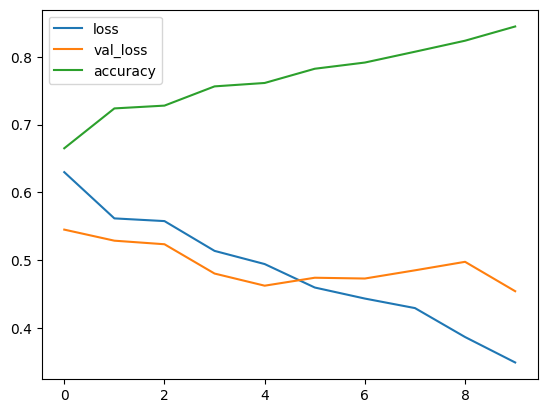

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

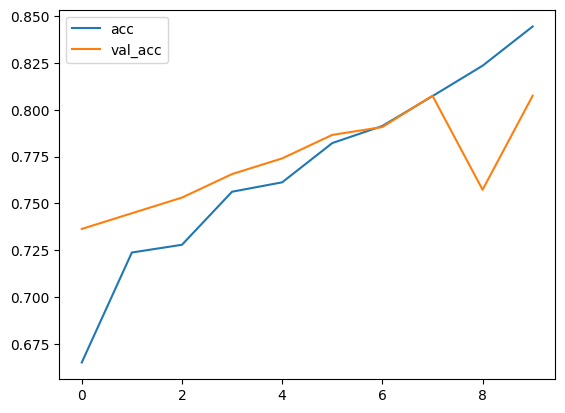

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
model.evaluate(test_dataset)

8/8 [==============================] - 9s 1s/step - loss: 0.5532 - accuracy: 0.7238


[0.5531646609306335, 0.723849356174469]

In [ ]:
y_pred = np.round(model.predict(test.flow_from_directory('/content/drive/MyDrive/rock-metal/Testing/',
                                                         target_size = (150, 150),
                                                         batch_size = 32, shuffle=False,
                                                         class_mode = "binary")))

Found 239 images belonging to 2 classes.
8/8 [==============================] - 10s 873ms/step


In [ ]:
print(classification_report(test_dataset.labels, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        79
           1       0.84      0.73      0.78       160

    accuracy                           0.72       239
   macro avg       0.70      0.72      0.70       239
weighted avg       0.75      0.72      0.73       239



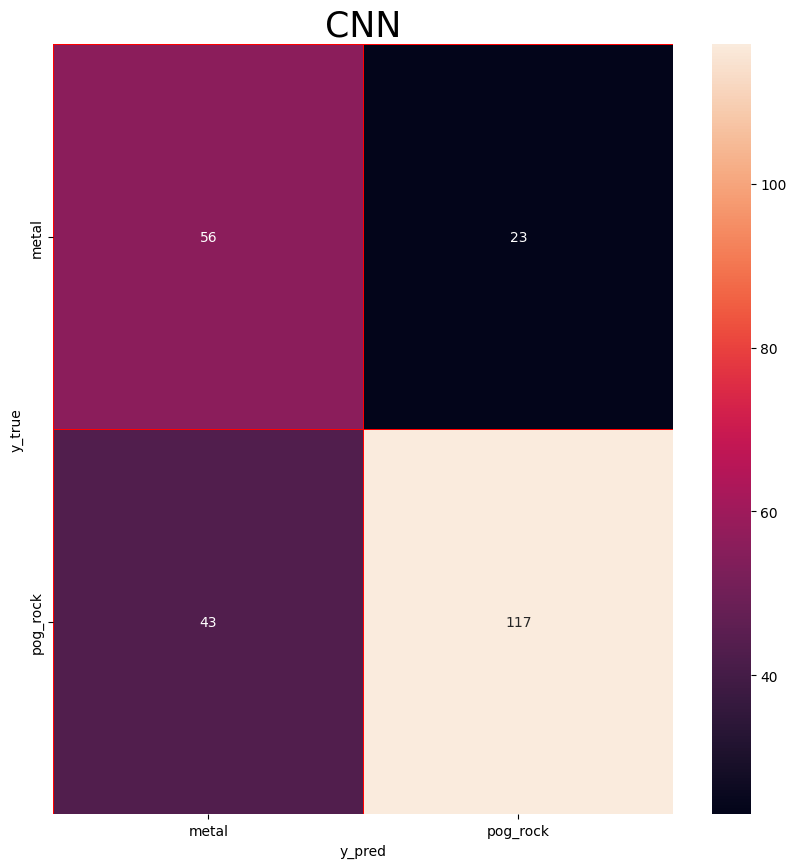

None


In [ ]:
print(confusion(test_dataset.labels, y_pred, "CNN"))